In [1]:
import random
import torch
from transformers import GPT2Config, GPT2LMHeadModel
import numpy as np


def set_seed(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

set_seed(42)

config = GPT2Config(
    vocab_size=50304,
    n_positions=256,
    n_embd=768,
    n_layer=12,
    n_head=12,
    activation_function="gelu"
)
gpt2 = GPT2LMHeadModel(config)

In [2]:
# Print the size of the model (a number of parameters it has) in millions
num_params = sum(p.numel() for p in gpt2.parameters() if p.requires_grad)
print(f"Total Parameters: {num_params / 1e6:.2f}M")

Total Parameters: 123.89M


In [3]:
from llm_trainer import LLMTrainer

# Train the model
trainer = LLMTrainer(model=gpt2, model_returns_logits=False)
trainer.train(max_steps=4000,
              save_each_n_steps=500,
              BATCH_SIZE=512,
              MINI_BATCH_SIZE=8,
              context_window=256,
              save_dir="checkpoints_gpt",
              logging_file="logs_training_gpt.csv"
              )

Training on: cuda
step: 0 | Loss: 11.562500 | norm: 12.7124 | lr: 2.000000e-05 | dt: 16.17s | tok/sec: 8106.88
step: 1 | Loss: 10.437500 | norm: 6.6390 | lr: 2.666667e-05 | dt: 5.56s | tok/sec: 23570.61
step: 2 | Loss: 9.750000 | norm: 4.0779 | lr: 3.333333e-05 | dt: 5.44s | tok/sec: 24081.60
step: 3 | Loss: 9.562500 | norm: 2.8125 | lr: 4.000000e-05 | dt: 5.50s | tok/sec: 23843.43
step: 4 | Loss: 9.500000 | norm: 2.5108 | lr: 4.666667e-05 | dt: 5.64s | tok/sec: 23238.03
step: 5 | Loss: 9.500000 | norm: 2.2217 | lr: 5.333333e-05 | dt: 7.07s | tok/sec: 18529.23
step: 6 | Loss: 9.500000 | norm: 2.2430 | lr: 6.000000e-05 | dt: 5.60s | tok/sec: 23407.09
step: 7 | Loss: 9.500000 | norm: 2.1964 | lr: 6.666667e-05 | dt: 5.55s | tok/sec: 23622.67
step: 8 | Loss: 9.437500 | norm: 2.2618 | lr: 7.333333e-05 | dt: 5.53s | tok/sec: 23714.63
step: 9 | Loss: 9.375000 | norm: 2.1575 | lr: 8.000000e-05 | dt: 5.55s | tok/sec: 23632.51
step: 10 | Loss: 9.375000 | norm: 2.0789 | lr: 8.666667e-05 | dt: 7.2

W0420 12:49:50.678000 8124 site-packages/torch/_inductor/utils.py:1137] [0/1] Not enough SMs to use max_autotune_gemm mode


=== sample 0 ===
Once upon a time, a woman was a long and she is a little woman of his death and he had been his wife, and he was his death in
=== sample 1 ===
Once upon a time was the first period, the time was in the most likely to be in the world. It’s the past, we have an
=== sample 2 ===
Once upon a time.<|endoftext|>-American
-American and the most of the New Zealand in the United States, the United States
-
- the U
=== sample 3 ===
Once upon a time, and the way of the world of the world’s first to the United States.
- “We are more than that
step: 251 | Loss: 6.031250 | norm: 1.4581 | lr: 1.693333e-03 | dt: 5.39s | tok/sec: 24310.09
step: 252 | Loss: 5.968750 | norm: 1.4499 | lr: 1.700000e-03 | dt: 6.85s | tok/sec: 19142.11
step: 253 | Loss: 6.031250 | norm: 0.7615 | lr: 1.706667e-03 | dt: 5.23s | tok/sec: 25049.68
step: 254 | Loss: 5.968750 | norm: 0.6346 | lr: 1.713333e-03 | dt: 5.31s | tok/sec: 24672.67
step: 255 | Loss: 5.937500 | norm: 0.6543 | lr: 1.720000e-03 | dt: 5.21s |

In [4]:
from transformers import AutoTokenizer
from llm_trainer import Evaluator

evaluator = Evaluator()
evaluator.eval_all(model=gpt2,
                   tokenizer=AutoTokenizer.from_pretrained("gpt2"),
                   return_logits=False,
                   max_length=256,
                   stride=128)


Evaluating on HellaSwag...

Evaluating on LAMBADA...

Evaluating on WikiText-103...

Evaluating on WikiText-2...

Evaluating on PTB...

Evaluation Summary:
╒══════════════╤════════════╤══════════╕
│ Benchmark    │ Metric     │    Value │
╞══════════════╪════════════╪══════════╡
│ HellaSwag    │ Accuracy   │   0.2633 │
├──────────────┼────────────┼──────────┤
│ LAMBADA      │ Perplexity │ 146.62   │
├──────────────┼────────────┼──────────┤
│ WikiText-103 │ Perplexity │  91.37   │
├──────────────┼────────────┼──────────┤
│ WikiText-2   │ Perplexity │  91.19   │
├──────────────┼────────────┼──────────┤
│ PTB          │ Perplexity │ 128.87   │
╘══════════════╧════════════╧══════════╛


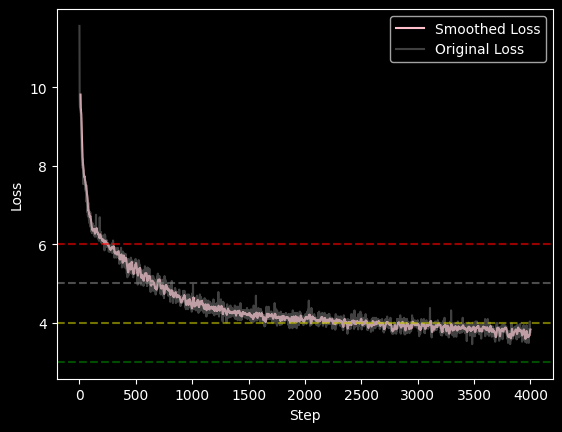

In [5]:
trainer.plot_loss(logging_file="logs_training_gpt.csv")